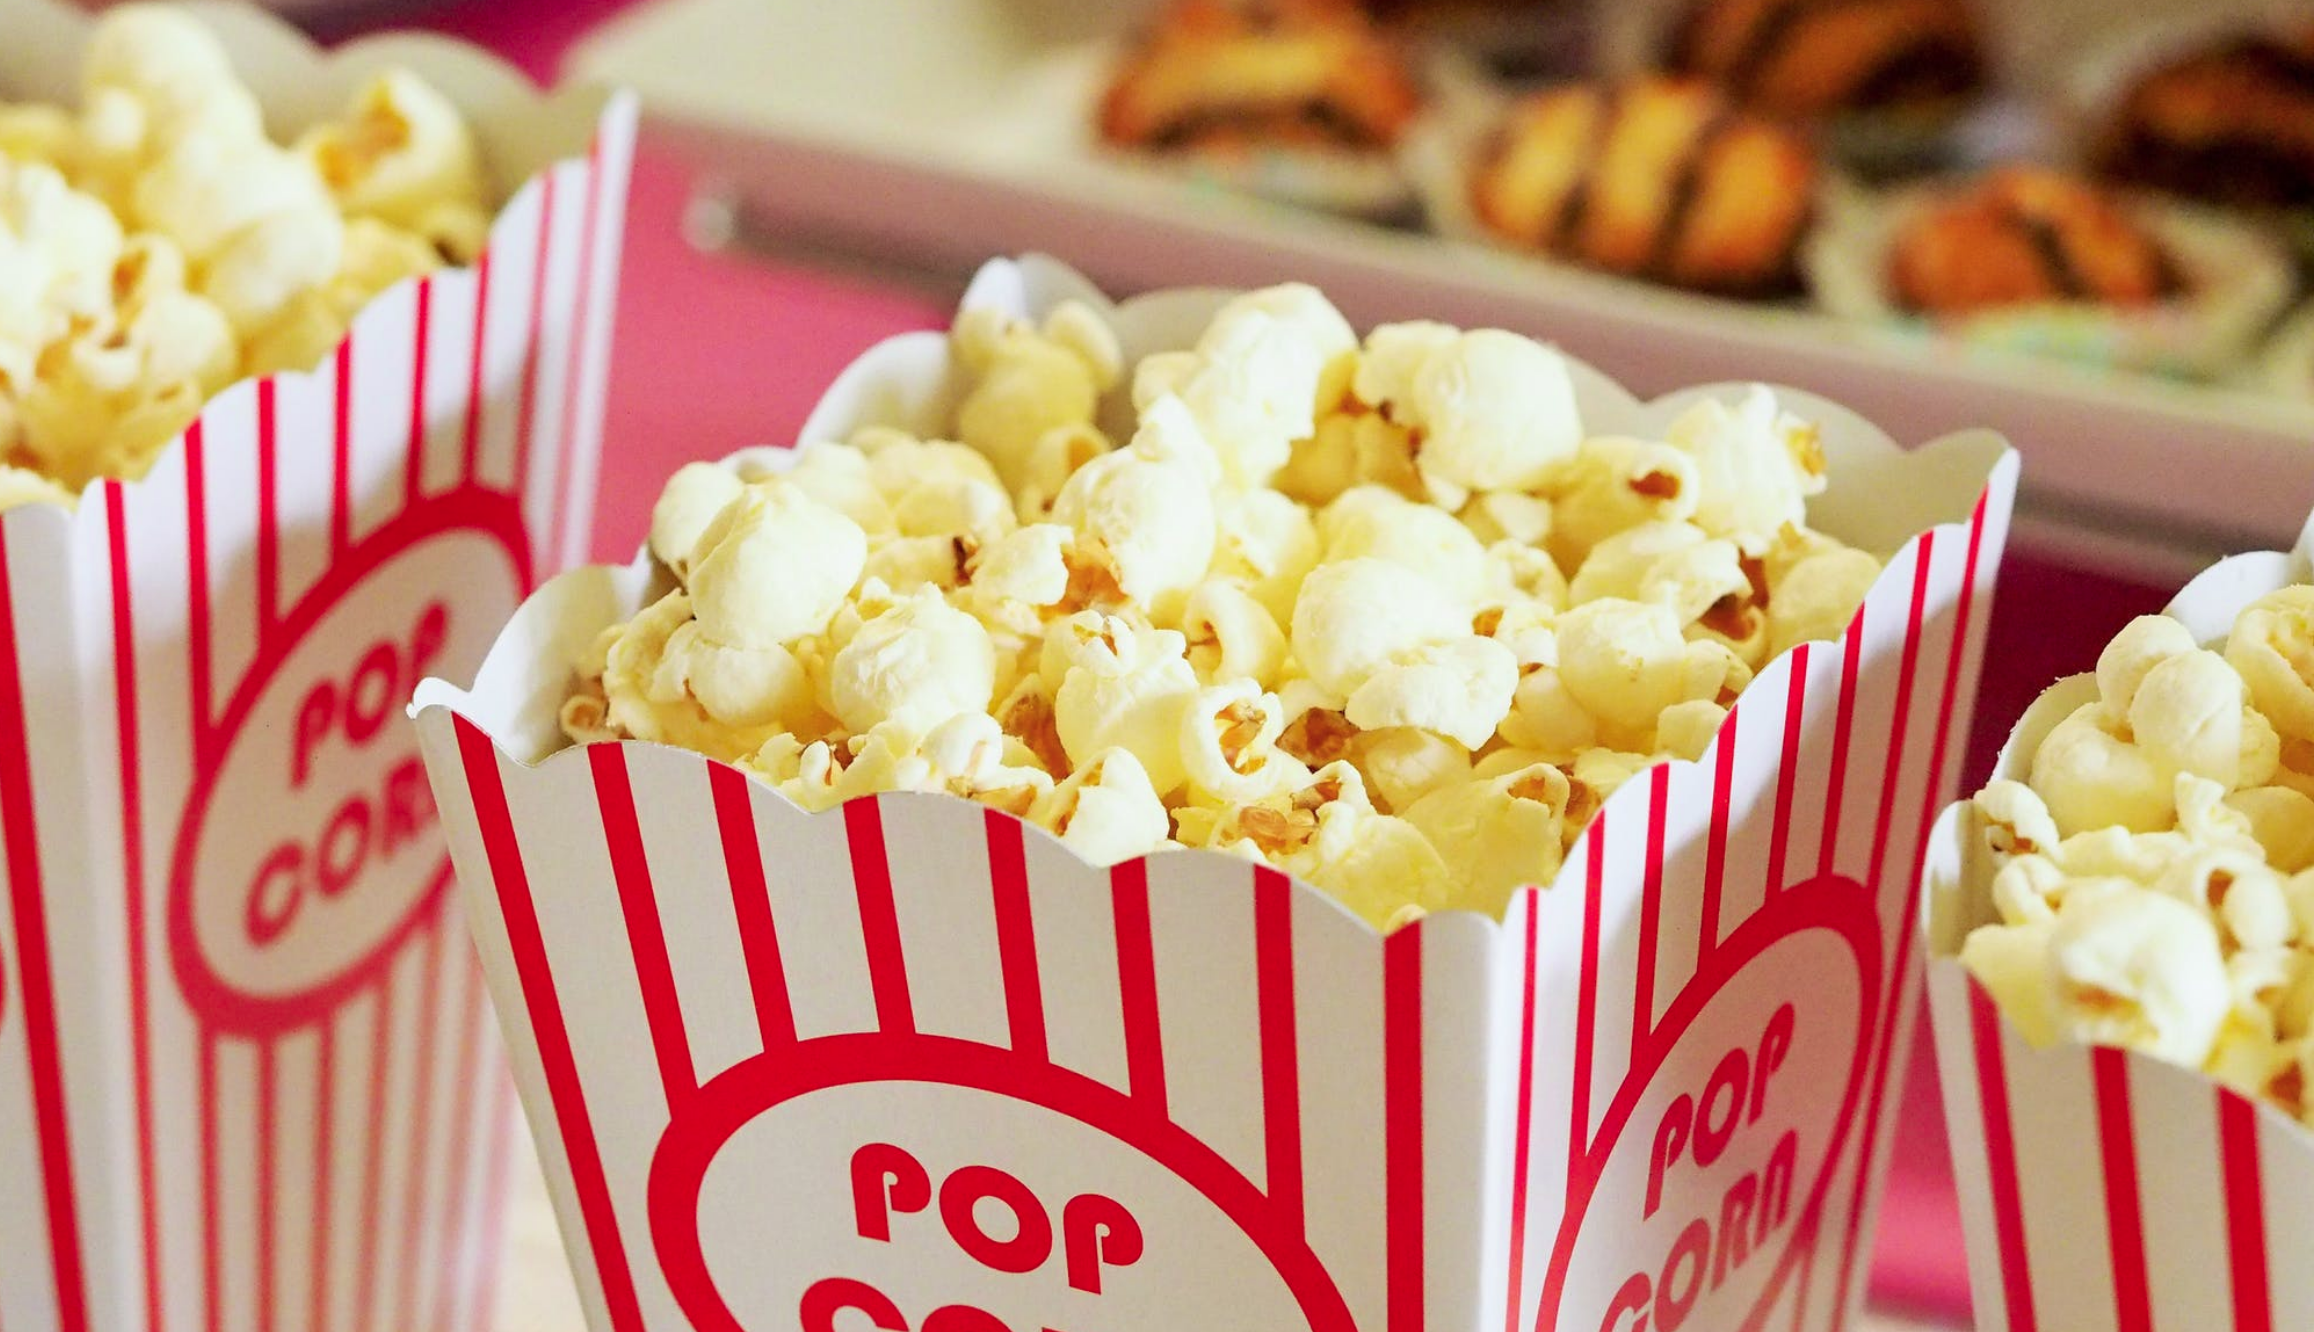

# Microsoft Film Market Analysis

Authors: [David Bruce](mailto:david.bruce14@gmail.com?) ,  [Brendan Ferris](mailto:brendan_frrs@gmail.com?)

### Overview

This project analyzes the potential opportunities for Microsoft to enter the film business. Descriptive analysis of Box Office information from the [Internet Movie Database](https://www.imdb.com/). Microsoft can use this analysis to effectively allocate rescources toward film ventures based on their goals. Analysis has shown that for 'average' movies -- movies without abnormally high or low returns, it would be beneficial to focus on a few specific genres.

### Business Problem

Our team has been put in charge of performing market analysis in order to explore what types of movies are doing the best at the box office. We will provide information

### Data Understanding

Using the IMDb databases found [here](zippedData), we were able to use IMDb's unique title (tconst) and name identifiers (nconst) to scrape the site for financial data including: budgets, opening weekend box office numbers, gross USA profit, and worldwide gross profits. We were also able to scrape name of Directors for the included films. Films that did not report any financial information on IMDb were not included in [the dataset](master_table.csv). Only movies from the last decade were used in our analysis.

### Data Preparation and Cleaning

Having scraped thousands of rows of financial data, as well as information about the movies’ director, from the IMDb website to supplement our existing database, we merged the tables together and were able to eliminate duplicates of the unique “T constant” attached to every film (also found in the url). We eliminated any columns that were ultimately inconsequential to our final analyses.

Using the scraped financial columns, we engineered two additional features, ‘Profit’ and ‘Roi’ (return on investment), and we created a function to convert foreign currencies to USD, making our financial data uniform in units.

The genre(s) of each movie provided us interesting insight into the types of films that succeed financially and by how much on average. Using the genres listed in the genres column we added an additional “dummy matrix” populated with 1’s and 0’s where the 1’s indicate which genre categories are attached to that film. The resulting dataframe can be seen below, and the notebook used to clean the data can be found [here](data).

In [1]:
import pandas as pd
import numpy as np

movies = pd.read_csv('master_table.csv')

In [2]:
movies.head(5)

primary_title      Country     Budget  Opening Weekend USA  \
0       Jurassic World          USA  150000000            208806270   
1          John Carter          USA  250000000             30180188   
2  Alice in Wonderland          USA  200000000            116101023   
3  Gou yan kan ren xin    Hong Kong          0                    0   
4      My First Client  South Korea          0                    0   

   Gross USA  Cumulative Worldwide Gross  start_year  runtime_minutes  \
0  652270625                  1670401444        2015            124.0   
1   73078100                   284139100        2012            132.0   
2  334191110                  1025467803        2010            108.0   
3          0                     2704326        2019             91.0   
4          0                     1424100        2019            114.0   

                               genres  averagerating  ...  Romance History  \
0   ['Action', 'Adventure', 'Sci-Fi']            7.0  ...      0.0     0.0   
1   ['Action', 'Adventure', 'Sci-Fi']            6.6  ...      0.0     0.0   
2  ['Adventure', 'Family', 'Fantasy']            6.5  ...      0.0     0.0   
3                           ['Drama']            NaN  ...      0.0     0.0   
4                           ['Drama']            NaN  ...      0.0     0.0   

   Biography  Horror  Fantasy  War  Documentary  Animation  Music  Family  
0        0.0     0.0      0.0  0.0          0.0        0.0    0.0     0.0  
1        0.0     0.0      0.0  0.0          0.0        0.0    0.0     0.0  
2        0.0     0.0      1.0  0.0          0.0        0.0    0.0     1.0  
3        0.0     0.0      0.0  0.0          0.0        0.0    0.0     0.0  
4        0.0     0.0      0.0  0.0          0.0        0.0    0.0     0.0  

[5 rows x 35 columns]

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17130 entries, 0 to 17129
Data columns (total 35 columns):
primary_title                 17130 non-null object
Country                       17105 non-null object
Budget                        17130 non-null int64
Opening Weekend USA           17130 non-null int64
Gross USA                     17130 non-null int64
Cumulative Worldwide Gross    17130 non-null int64
start_year                    17130 non-null int64
runtime_minutes               15950 non-null float64
genres                        17130 non-null object
averagerating                 16467 non-null float64
numvotes                      16467 non-null float64
director                      13439 non-null object
Profit                        17130 non-null int64
Roi                           5397 non-null float64
Western                       17130 non-null float64
Thriller                      17130 non-null float64
Comedy                        17130 non-null float64
Drama  

In [4]:
movies.shape

(17130, 35)

## Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
movies['Profit'] = movies['Profit'].astype(float)
movies = movies.replace(0.0, np.nan)
# replacing 0 with nan values in order to find outliers

#### Detecting outliers using Inter-Quartile Range

In [7]:
q1 = movies.quantile(0.25)
q3 = movies.quantile(0.75)
iqr = q3 - q1
outlier = iqr * 1.5
outlier #outlier thresholds for every continuous variable. 
lower_bound = q1 - outlier #all values below this number are outliers
upper_bound = q3 + outlier #all values above this number are outliers

#### Generating a List of Unique Genres

In [8]:
import ast
movies['genres'] = movies['genres'].map(lambda x: ast.literal_eval(x))
list_of_genres = [row[0] for row in movies['genres']]
l_o_genres = list(set(list_of_genres))
l_o_genres.remove('NaN')
l_o_genres = sorted(l_o_genres) #getting unique genre

In [9]:
#generate a dataframe removing outliers from the ROI column.
roi_df = movies.loc[(movies['Roi'] > lower_bound[9]) & (movies['Roi'] < upper_bound[9])]
avg_roi_per_genre = [roi_df['Roi'].iloc[num].mean() for num in list(range(-22,-1))]

Based on our analysis, six specific genres generate the consistent returns on investment. The genre's we would suggest allocating rescources to include:
 
                - Crime
                - Documentary
                - Family (highest ROI)
                - Music
                - Romance
                - Thriller
               

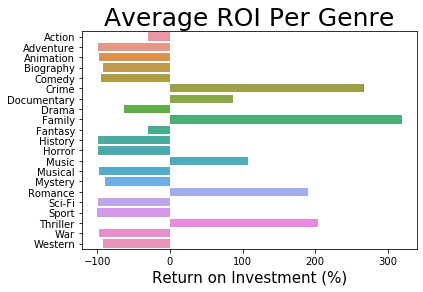

In [10]:
sns.barplot(x=avg_roi_per_genre, y=l_o_genres).set_title('Average ROI Per Genre', size=25);
plt.xlabel('Return on Investment (%)', size=15);

_For users, the volume of reviews is even more pertinent than their valence, such that it is an important barometer of film performance._

[François A. Carrillat et al. Debates and assumptions about motion picture performance: a meta-analysis](https://link.springer.com/article/10.1007/s11747-017-0561-6)

Our data reflects the findings of the above cited study, showing a significantly stronger correlation between the number of reviews and profit than the review ratings themselves and profit.

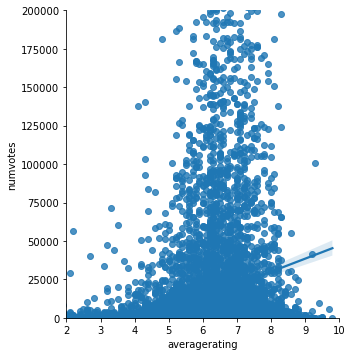

In [11]:
rating_and_vote_no_outliers = None
g = sns.lmplot(x="averagerating", y="numvotes", data=movies);
g.set(ylim=(0, 200000))
g.set(xlim=(2, 10));

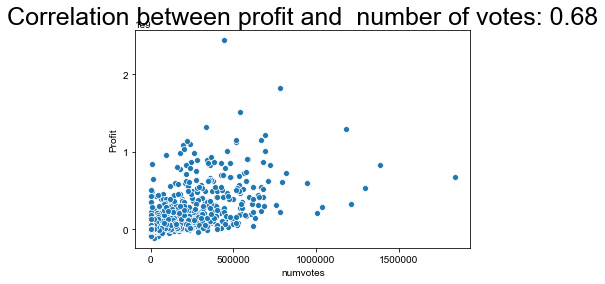

In [12]:
corr = movies['numvotes'].corr(movies['Profit']).round(2)
g = sns.scatterplot(x='numvotes', y='Profit', data=movies).set_title(f'Correlation between profit and  number of votes: {corr}', size=25)
sns.set(rc={'figure.figsize':(15,10)})
sns.set_context("poster")


# Directoral Staffing

For higher budget ventures, we suggest hiring from the below list in order to 

In [13]:
top_10_profitable_directors = movies.groupby(['director']).sum().sort_values('Profit', ascending=False)[:10]
top_10_profitable_directors

Budget  Opening Weekend USA     Gross USA  \
director                                                            
David Yates        806500000.0          469301146.0  1.197994e+09   
J.J. Abrams        760000000.0          530967266.0  1.807648e+09   
James Wan          376500000.0          310459455.0  9.630646e+08   
Christopher Nolan  880000000.0          341896480.0  1.159676e+09   
Joss Whedon        470000000.0          398881759.0  1.086693e+09   
Bill Condon        439000000.0          463653821.0  1.116242e+09   
Peter Jackson      655000000.0          212986834.0  8.344471e+08   
Michael Bay        648000000.0          262815833.0  7.778736e+08   
Francis Lawrence   522000000.0          416333676.0  1.149112e+09   
Todd Phillips      343000000.0          271194540.0  8.456893e+08   

                   Cumulative Worldwide Gross  start_year  runtime_minutes  \
director                                                                     
David Yates                      4.144757e+09       10071            652.0   
J.J. Abrams                      3.869830e+09        8058            380.0   
James Wan                        3.244512e+09       10069            601.0   
Christopher Nolan                3.426085e+09       10073            587.0   
Joss Whedon                      2.926966e+09        6039            393.0   
Bill Condon                      2.878288e+09       12087            593.0   
Peter Jackson                    2.951257e+09        8057            573.0   
Michael Bay                      2.920579e+09        8055            602.0   
Francis Lawrence                 2.547380e+09       10071            666.0   
Todd Phillips                    2.321031e+09       10069            411.0   

                   averagerating   numvotes        Profit           Roi  ...  \
director                                                                 ...   
David Yates                 36.0  1796023.0  3.338257e+09   2355.681050  ...   
J.J. Abrams                 22.7  1550890.0  3.109830e+09   1600.944665  ...   
James Wan                   35.3  1391060.0  2.868012e+09  12488.228049  ...   
Christopher Nolan           33.7  4994749.0  2.546085e+09   1543.379055  ...   
Joss Whedon                 22.6  1864664.0  2.451625e+09   1051.494505  ...   
Bill Condon                 30.7   756159.0  2.439288e+09   2166.734426  ...   
Peter Jackson               31.5  1739425.0  2.276390e+09   1073.350722  ...   
Michael Bay                 23.5   956722.0  2.272579e+09   1316.833031  ...   
Francis Lawrence            34.2  1449439.0  2.025380e+09   1708.959068  ...   
Todd Phillips               25.9  1161047.0  1.978031e+09   3079.498923  ...   

                   Romance  History  Biography  Horror  Fantasy  War  \
director                                                               
David Yates            0.0      0.0        0.0     0.0      4.0  0.0   
J.J. Abrams            0.0      0.0        0.0     0.0      2.0  0.0   
James Wan              0.0      0.0        0.0     3.0      1.0  0.0   
Christopher Nolan      0.0      1.0        0.0     0.0      0.0  0.0   
Joss Whedon            1.0      0.0        0.0     0.0      0.0  0.0   
Bill Condon            0.0      0.0        1.0     0.0      3.0  0.0   
Peter Jackson          0.0      1.0        0.0     0.0      3.0  1.0   
Michael Bay            0.0      0.0        0.0     0.0      0.0  0.0   
Francis Lawrence       1.0      0.0        0.0     0.0      0.0  0.0   
Todd Phillips          0.0      0.0        0.0     0.0      0.0  0.0   

                   Documentary  Animation  Music  Family  
director                                                  
David Yates                0.0        0.0    0.0     2.0  
J.J. Abrams                0.0        0.0    0.0     0.0  
James Wan                  0.0        0.0    0.0     0.0  
Christopher Nolan          0.0        0.0    0.0     0.0  
Joss Whedon                0.0        0.0    0.0     0.0  
Bill Condon        

For movies with less than the upper budget threshold ($36,000,000) we would suggest looking into hiring these directors. 

In [14]:
budget_outliers_removed = movies.loc[movies['Budget'] < 36000000.0] #exclude abnormally large budgets
profitable_directors_no_budget_outliers = budget_outliers_removed.groupby(['director']).sum().sort_values('Profit', ascending=False)[:10]
profitable_directors_no_budget_outliers

Budget  Opening Weekend USA    Gross USA  \
director                                                           
Jing Wu             42100000.0             219022.0    2721100.0   
Andy Muschietti     50000000.0          151805729.0  400457054.0   
M. Night Shyamalan  34000000.0          105767455.0  314545938.0   
James Wan           26500000.0           95398893.0  274995738.0   
Jordan Peele        24500000.0          104494685.0  351125245.0   
Damien Chazelle     33300000.0            1016492.0  164193803.0   
Tom Hooper          30000000.0             542768.0  149911467.0   
David F. Sandberg   19900000.0           56694507.0  169361036.0   
Jon M. Chu          83000000.0           75219392.0  298338260.0   
Lasse Hallström     97000000.0           81072308.0  270113403.0   

                    Cumulative Worldwide Gross  start_year  runtime_minutes  \
director                                                                      
Jing Wu                            951736770.0        4032            213.0   
Andy Muschietti                    848224624.0        4030            235.0   
M. Night Shyamalan                 623903459.0        6050            340.0   
James Wan                          580978106.0        6036            321.0   
Jordan Peele                       510612370.0        4036            220.0   
Damien Chazelle                    495470131.0        4030            234.0   
Tom Hooper                         491565840.0        4025            237.0   
David F. Sandberg                  455384719.0        4033            190.0   
Jon M. Chu                         510181213.0       10067            542.0   
Lasse Hallström                    507829887.0        8054            445.0   

                    averagerating   numvotes       Profit           Roi  ...  \
director                                                                 ...   
Jing Wu                      11.7     9231.0  909636770.0   3369.874400  ...   
Andy Muschietti              13.6   517610.0  798224624.0   2781.320564  ...   
M. Night Shyamalan           20.3   594795.0  589903459.0   5997.933746  ...   
James Wan                    21.0   792658.0  554478106.0  11173.030607  ...   
Jordan Peele                 14.8   502985.0  486112370.0   6752.096011  ...   
Damien Chazelle              16.5  1052986.0  462170131.0   2772.630782  ...   
Tom Hooper                   15.1   740502.0  461565840.0   3077.105600  ...   
David F. Sandberg            12.8   191052.0  435484719.0   4881.578716  ...   
Jon M. Chu                   20.7   248835.0  427181213.0   1854.200383  ...   
Lasse Hallström              27.4   349079.0  410829887.0   1750.539532  ...   

                    Romance  History  Biography  Horror  Fantasy  War  \
director                                                                
Jing Wu                 0.0      0.0        0.0     0.0      0.0  0.0   
Andy Muschietti         0.0      0.0        0.0     2.0      0.0  0.0   
M. Night Shyamalan      0.0      0.0        0.0     2.0      0.0  0.0   
James Wan               0.0      0.0        0.0     3.0      0.0  0.0   
Jordan Peele            0.0      0.0        0.0     2.0      0.0  0.0   
Damien Chazelle         0.0      0.0        0.0     0.0      0.0  0.0   
Tom Hooper              1.0      1.0        2.0     0.0      0.0  0.0   
David F. Sandberg       0.0      0.0        0.0     2.0      0.0  0.0   
Jon M. Chu              2.0      0.0        0.0     0.0      0.0  0.0   
Lasse Hallström         2.0      0.0        0.0     0.0      0.0  1.0   

                    Documentary  Animation  Music  Family  
director                                                   
Jing Wu                     0.0        0.0    0.0     0.0  
Andy Muschietti             0.0        0.0    0.0     0.0  
M. Night Shyamalan          0.0        0.0    0.0     0.0  
James Wan                   0.0        0.0    0.0     0.0  
Jordan Peele                0.0        0.0    0.0     0.0  


## Regional Considerations

In [15]:
countries_by_roi = movies.groupby('Country').sum().sort_values(['Roi'], ascending=False).iloc[:10]
countries_by_roi['Roi'] #countries total ROI

Country
USA          380915.834389
Turkey       189250.951254
Japan        142829.738857
Venezuela    124873.125345
China         67823.531228
UK            55496.405119
Brazil        49744.783175
Spain         33852.169843
Russia        29523.538417
Portugal      28777.908867
Name: Roi, dtype: float64

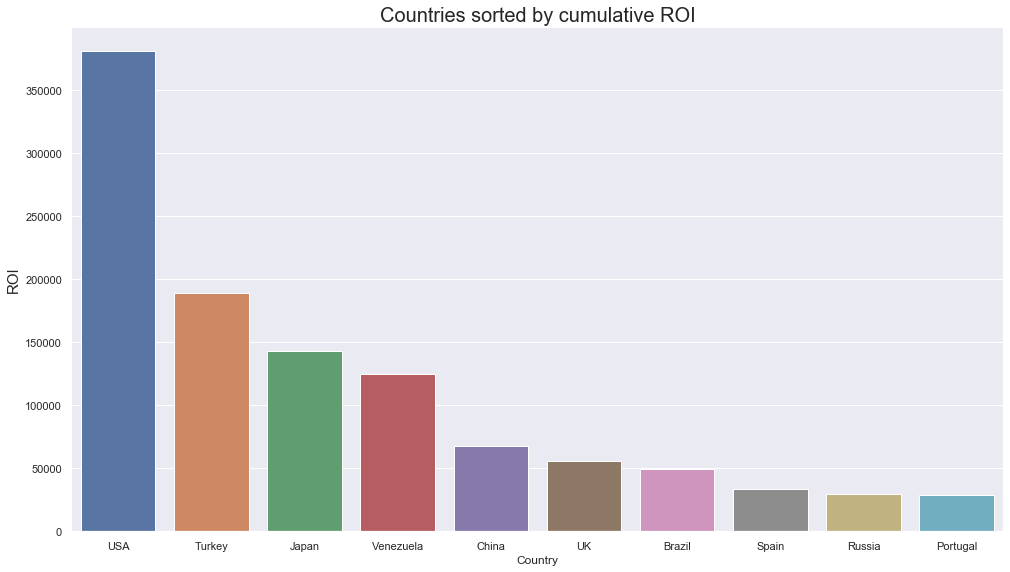

In [16]:
sns.set(style="whitegrid")
y = countries_by_roi['Roi'].values
x = countries_by_roi.index
sns.set(rc={'figure.figsize':(16.7,9.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("ROI", size=15)

sns.barplot(x,y).set_title('Countries sorted by cumulative ROI', size=20);

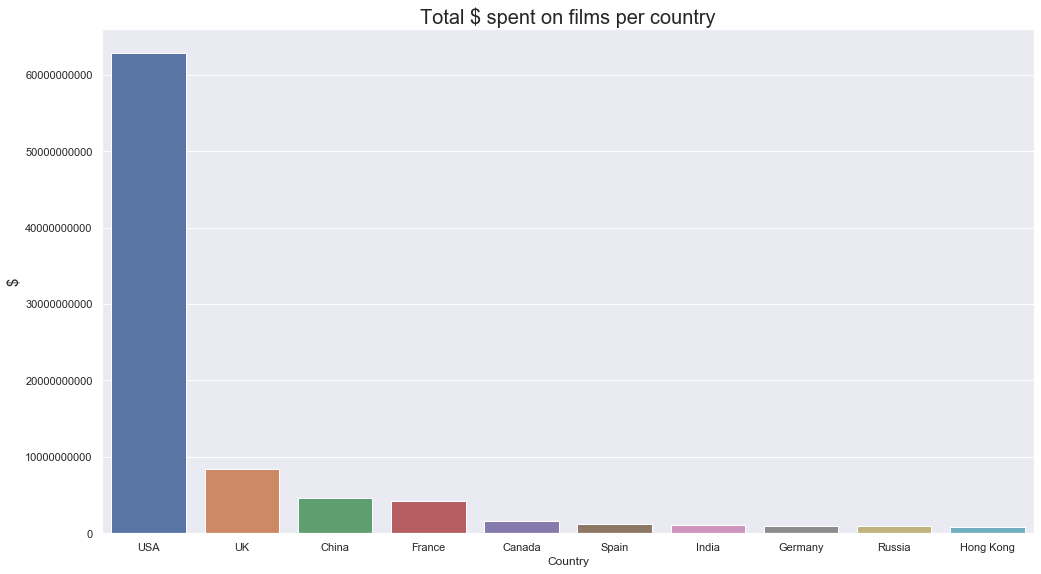

In [17]:
most_money_spent_by_country = movies['Budget'].groupby(movies['Country']).sum().sort_values(ascending=False)

sns.set(style="whitegrid")
y = most_money_spent_by_country[:10].values
x = most_money_spent_by_country[:10].index
sns.set(rc={'figure.figsize':(16.7,9.27)})
plt.ticklabel_format(style='plain', axis='y')
plt.ylabel("$", size=15)

sns.barplot(x,y).set_title('Total $ spent on films per country', size=20);

Conclusions include: 

- **Number of reviews can significantly impact profits**, put time and energy into producing films that bring in reviews. Our findings indicate this number is more important than the average rating. Similar to the above mentioned study. 


- ROI highest among movies with: 
                            - Crime
                            - Documentary
                            - Family
                            - Music
                            - Romance
                            - Thriller

- The vast majority of movie budgets are spent in the Unites States; however, there are cheaper markets that offer significant returns on investment. 


- Based on the cumulative ROI figures, additional analysis may yield insights into less competative markets and more profitable audiences.


## Next Steps

Further analysis may find interesting opportunities in overseas markets where the cost of making movies may be low, but potential returns on investment seem high. 